# Python

In [5]:
x = 4
y = 7.9
x + y

11.9

In [3]:
x = 'hello'
y = ' world'
x + y

'hello world'

In [15]:
for i in [3, 5, 7]:
    print(i)

3
5
7


In [12]:
if 5 != 5:
    print('Indeed')
else:
    print('no')

no


# Supervised Learning - Classifying Points (synthetic data)

Import Python modules:

In [17]:
import numpy as np               # for scientific computing
import matplotlib.pyplot as plt  # for generating plots
#%matplotlib notebook

Create `training` set, containing points and labels (colors):

In [18]:
X_train = np.array([[1,1], [2,2.5], [3,1.2], [5.5,6.3], [6,9], [7,6]])
Y_train = ['red', 'red', 'red', 'blue', 'blue', 'blue']

We can think of `X_train` as a two dimensional array:

In [20]:
print(X_train[5,0])
print(X_train[5,1])

7.0
6.0


Python has a convenient `slicing` syntax:

In [27]:
print(X_train[:, 0])
print(X_train[:, 1])

[1.  2.  3.  5.5 6.  7. ]
[1.  2.5 1.2 6.3 9.  6. ]


Plot the `training` set:

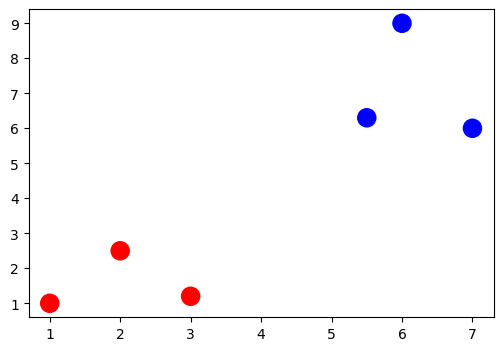

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(X_train[:,0], X_train[:,1], s = 170, color = Y_train[:])
plt.show()

Create a new `test` point:

In [28]:
X_test = np.array([3,4])

Plot again:

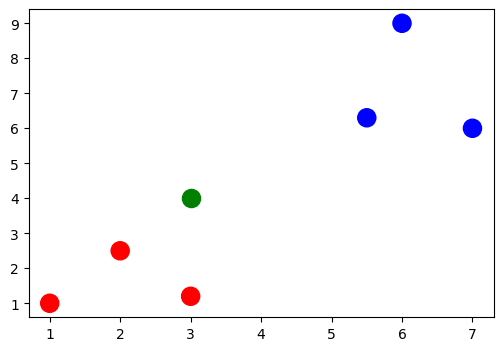

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(X_train[:,0], X_train[:,1], s = 170, color = Y_train[:])
plt.scatter(X_test[0], X_test[1], s = 170, color = 'green')
plt.show()

To run the `Nearest Neighbor Classifier`, define a distance function:

In [33]:
def dist(x, y):   
    return np.sqrt(np.sum((x - y)**2))

For each point in `X_train` we compute its distance to `X_test`:

In [34]:
num = len(X_train) # Number of points in X_train
distance = np.zeros(num) # Numpy arrays of zeros
for j in range(num):
    distance[j] = dist(X_train[j], X_test)
print(distance)

[3.60555128 1.80277564 2.8        3.39705755 5.83095189 4.47213595]


Choose the point in `X_train` with the minimal distance from `X_new`:

In [35]:
min_index = np.argmin(distance) # Index with smallest distance
print(Y_train[min_index])

red


# Supervised Learning - Classifying Images

Load the `digits` dataset from `sklearn`:

In [36]:
from sklearn import datasets
digits = datasets.load_digits()

The dataset contains `1797` images. Two arrays: `digits.images` and `digits.target`.

In [38]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Let us plot this!

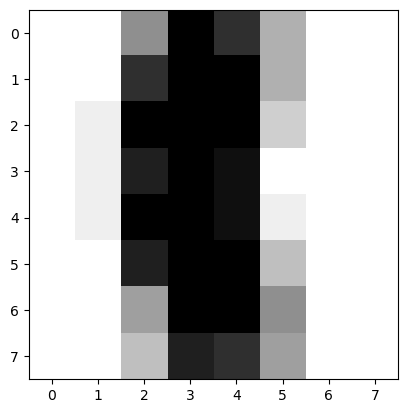

In [41]:
plt.figure()
plt.imshow(digits.images[657], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

Print true label:

In [42]:
print(digits.target[657])

1


Create the `training` set by choosing the first `10` images in the data set:

In [43]:
X_train = digits.data[0:10]
Y_train = digits.target[0:10]

Choose a `test` image:

In [44]:
X_test = digits.data[345]

Plot it:

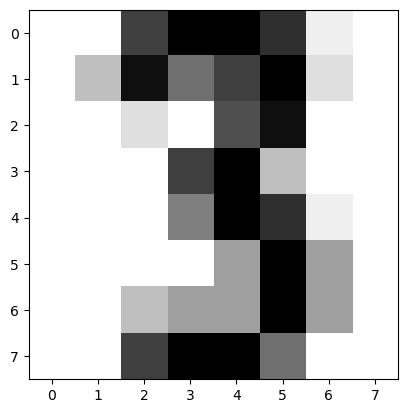

In [45]:
plt.figure()
plt.imshow(digits.images[345], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

Run the `Nearest Neighbor Classifier`:

In [46]:
num = len(X_train)
distance = np.zeros(num)
for i in range(num):
    distance[i] = dist(X_train[i], X_test)
min_index = np.argmin(distance)
print(Y_train[min_index])

3


Make sure that the answer is correct:

In [47]:
print(digits.target[min_index])

3


Number of mistakes done in testing `100` images:

In [48]:
num = len(X_train)
no_errors = 0
distance = np.zeros(num)
for j in range(1697, 1797):
    X_test = digits.data[j]
    for i in range(num):
        distance[i] = dist(X_train[i], X_test)
    min_index = np.argmin(distance)
    if Y_train[min_index] != digits.target[j]:
        no_errors += 1
print(no_errors)

37


### Improving the performance

Enlarge `training` data from `10` to `1000` images:

In [49]:
X_train = digits.data[0:1000]
Y_train = digits.target[0:1000]

Number of mistakes done in testing `100` images:

In [50]:
num = len(X_train)
no_errors = 0
distance = np.zeros(num)
for j in range(1697, 1797):
    X_test = digits.data[j]
    for i in range(num):
        distance[i] = dist(X_train[i], X_test)
    min_index = np.argmin(distance)
    if Y_train[min_index] != digits.target[j]:
        no_errors += 1
print(no_errors)

3


# Supervised Learning - Predict Stock Direction

### Download Financial Data

In [ ]:
# Install yfinance if needed (to download data from Yahoo Finance)
# pip install yfinance

In [51]:
import pandas as pd
import numpy as np
import yfinance as yf

In [52]:
df = yf.download('SPY', start='2000-01-01', end='2023-06-01')
# Many indices and stocks to choose from, for instance: SPY AAPL MSFT ...

[*********************100%***********************]  1 of 1 completed


In [53]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,94.595016,8164300
2000-01-04,143.531250,144.062500,139.640625,139.750000,90.895844,8089800
2000-01-05,139.937500,141.531250,137.250000,140.000000,91.058411,12177900
2000-01-06,139.625000,141.500000,137.750000,137.750000,89.595009,6227200
2000-01-07,140.312500,145.750000,140.062500,145.750000,94.798325,8066500
...,...,...,...,...,...,...
2023-05-24,412.420013,412.820007,409.880005,411.089996,409.568604,89213700
2023-05-25,414.739990,416.160004,412.410004,414.649994,413.115448,90961600
2023-05-26,415.329987,420.769989,415.250000,420.019989,418.465546,93830000


<Axes: xlabel='Date'>

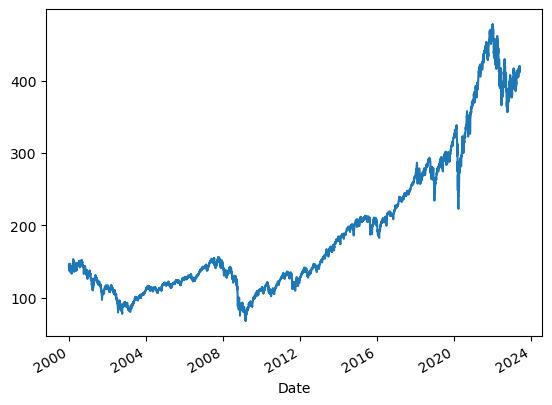

In [54]:
df['Close'].plot()

### Feature Engineering

In [57]:
df['Today'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
df['Lag1'] = (df['Close'].shift(1) - df['Close'].shift(2)) / df['Close'].shift(2)
df['Lag2'] = (df['Close'].shift(1) - df['Close'].shift(3)) / df['Close'].shift(3)
df['Lag3'] = (df['Close'].shift(1) - df['Close'].shift(4)) / df['Close'].shift(4)
df['Lag4'] = (df['Close'].shift(1) - df['Close'].shift(5)) / df['Close'].shift(5)
df['Lag5'] = (df['Close'].shift(1) - df['Close'].shift(6)) / df['Close'].shift(6)

In [58]:
df

,Open,High,Low,Close,Adj Close,Volume,Today,Lag1,Lag2,Lag3,Lag4,Lag5
Date,,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,94.595016,8164300,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,143.531250,144.062500,139.640625,139.750000,90.895844,8089800,-0.039106,NaN,NaN,NaN,NaN,NaN
2000-01-05,139.937500,141.531250,137.250000,140.000000,91.058411,12177900,0.001789,-0.039106,NaN,NaN,NaN,NaN
2000-01-06,139.625000,141.500000,137.750000,137.750000,89.595009,6227200,-0.016071,0.001789,-0.037387,NaN,NaN,NaN
2000-01-07,140.312500,145.750000,140.062500,145.750000,94.798325,8066500,0.058076,-0.016071,-0.014311,-0.052858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,412.420013,412.820007,409.880005,411.089996,409.568604,89213700,-0.007245,-0.011223,-0.010821,-0.012261,-0.002746,0.009360
2023-05-25,414.739990,416.160004,412.410004,414.649994,413.115448,90961600,0.008660,-0.007245,-0.018386,-0.017988,-0.019417,-0.009970
2023-05-26,415.329987,420.769989,415.250000,420.019989,418.465546,93830000,0.012951,0.008660,0.001352,-0.009886,-0.009484,-0.010925


### Label Engineering

In [63]:
df['Direction_Up'] = np.where(df['Today'] >= 0, 1, 0)

In [64]:
df

,Open,High,Low,Close,Adj Close,Volume,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Direction_Up
Date,,,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,94.595016,8164300,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-01-04,143.531250,144.062500,139.640625,139.750000,90.895844,8089800,-0.039106,NaN,NaN,NaN,NaN,NaN,0
2000-01-05,139.937500,141.531250,137.250000,140.000000,91.058411,12177900,0.001789,-0.039106,NaN,NaN,NaN,NaN,1
2000-01-06,139.625000,141.500000,137.750000,137.750000,89.595009,6227200,-0.016071,0.001789,-0.037387,NaN,NaN,NaN,0
2000-01-07,140.312500,145.750000,140.062500,145.750000,94.798325,8066500,0.058076,-0.016071,-0.014311,-0.052858,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,412.420013,412.820007,409.880005,411.089996,409.568604,89213700,-0.007245,-0.011223,-0.010821,-0.012261,-0.002746,0.009360,0
2023-05-25,414.739990,416.160004,412.410004,414.649994,413.115448,90961600,0.008660,-0.007245,-0.018386,-0.017988,-0.019417,-0.009970,1
2023-05-26,415.329987,420.769989,415.250000,420.019989,418.465546,93830000,0.012951,0.008660,0.001352,-0.009886,-0.009484,-0.010925,1


### Data Processing and Visualization

In [65]:
# Check for missing data
df.isnull().sum().sum() == 0

False

In [66]:
# Remove rows with missing data
df = df.dropna(axis = 0, how ='any') 
df.isnull().sum().sum()

0

In [67]:
df

,Open,High,Low,Close,Adj Close,Volume,Today,Lag1,Lag2,Lag3,Lag4,Lag5,Direction_Up
Date,,,,,,,,,,,,,
2000-01-11,145.812500,146.093750,143.500000,144.500000,93.985283,7503700,-0.011966,0.003431,0.061706,0.044643,0.046512,0.005587,0
2000-01-12,144.593750,144.593750,142.875000,143.062500,93.050301,6907700,-0.009948,-0.011966,-0.008576,0.049002,0.032143,0.033989,0
2000-01-13,144.468750,145.750000,143.281250,145.000000,94.310509,5158300,0.013543,-0.009948,-0.021795,-0.018439,0.038566,0.021875,1
2000-01-14,146.531250,147.468750,145.968750,146.968750,95.591026,7437300,0.013578,0.013543,0.003460,-0.008547,-0.005146,0.052632,1
2000-01-18,145.343750,146.625000,145.187500,145.812500,94.838959,6488500,-0.007867,0.013578,0.027304,0.017085,0.004915,0.008362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,412.420013,412.820007,409.880005,411.089996,409.568604,89213700,-0.007245,-0.011223,-0.010821,-0.012261,-0.002746,0.009360,0
2023-05-25,414.739990,416.160004,412.410004,414.649994,413.115448,90961600,0.008660,-0.007245,-0.018386,-0.017988,-0.019417,-0.009970,1
2023-05-26,415.329987,420.769989,415.250000,420.019989,418.465546,93830000,0.012951,0.008660,0.001352,-0.009886,-0.009484,-0.010925,1


/Users/patrickrebeschini/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


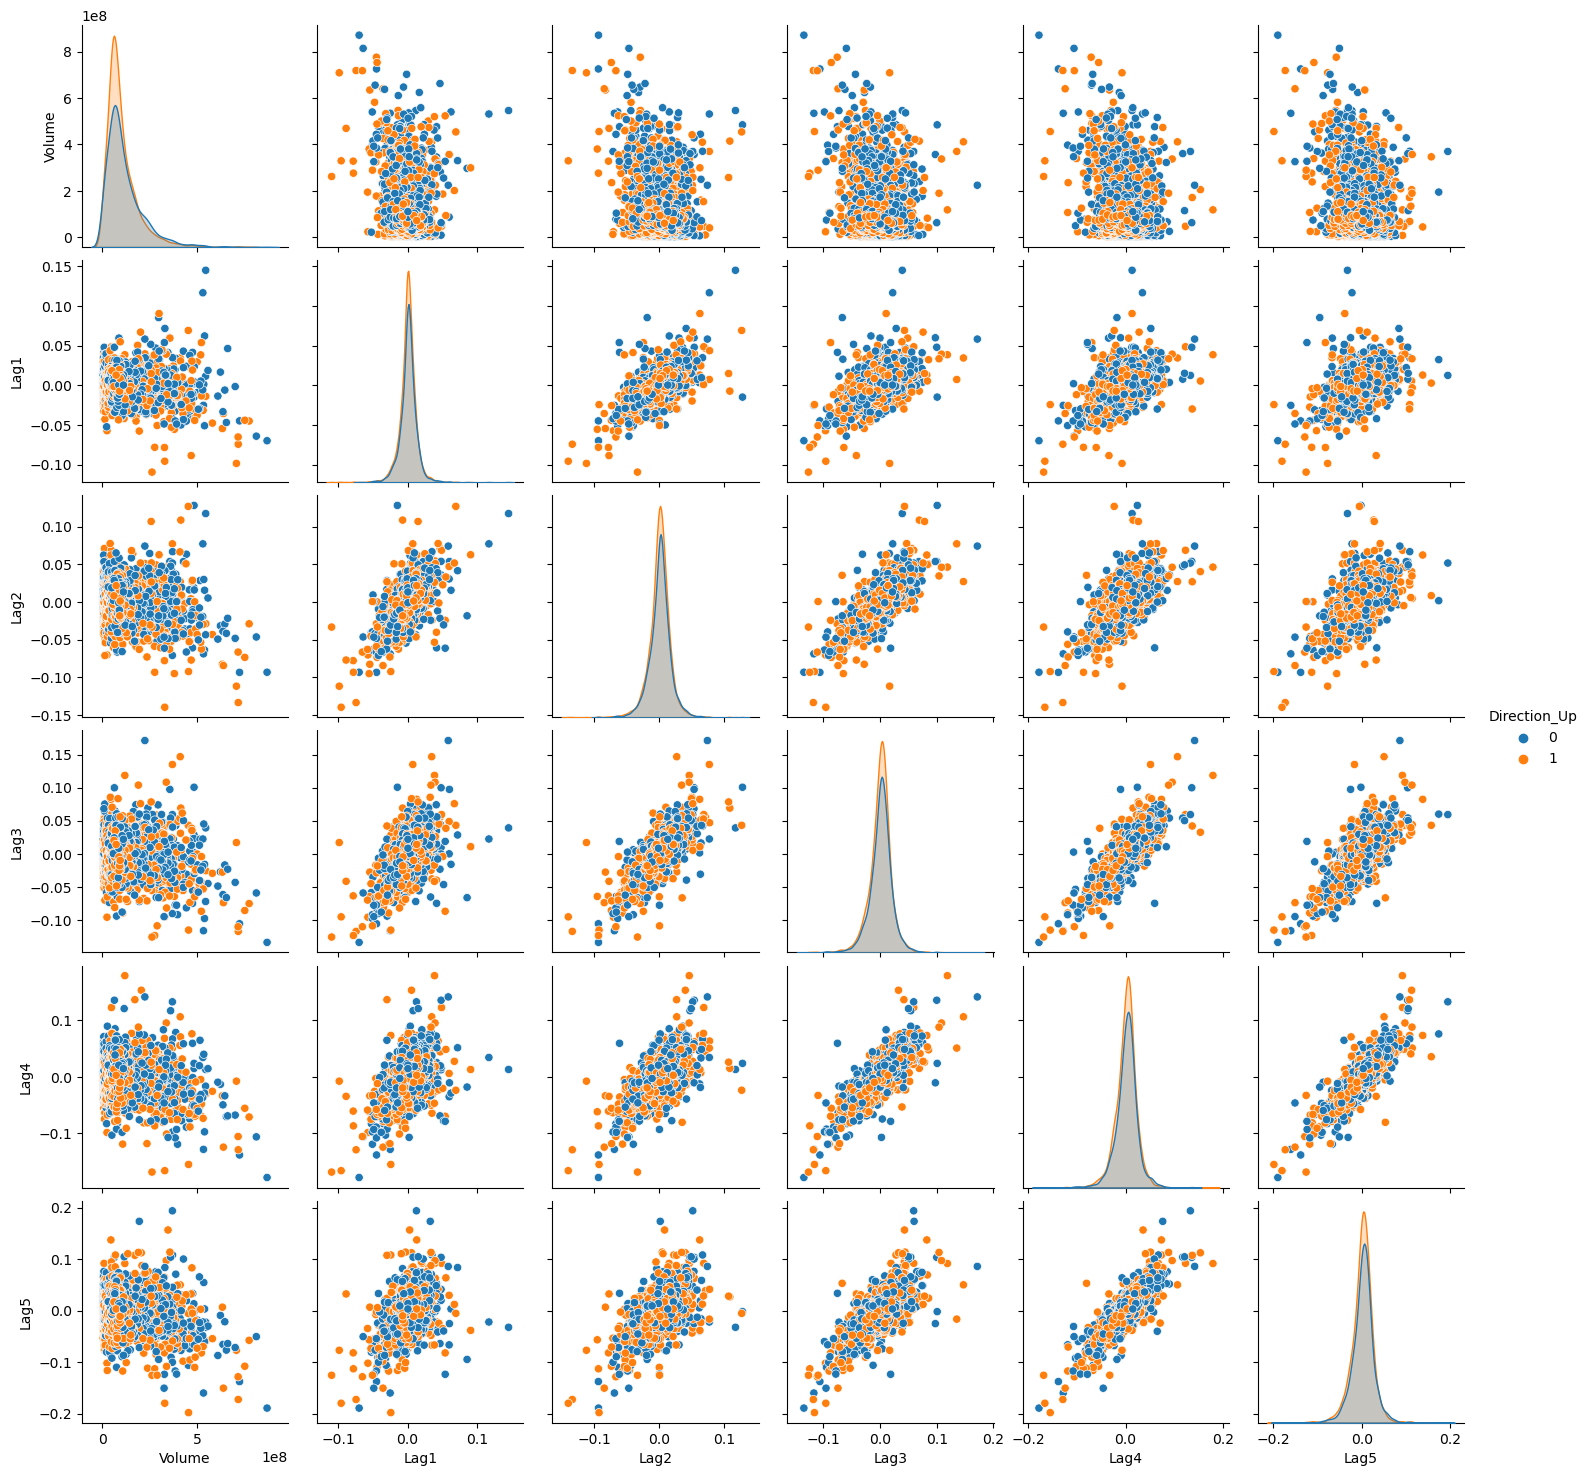

In [68]:
# Pairplot
import seaborn as sns
sns.pairplot(df[['Volume','Lag1','Lag2','Lag3','Lag4','Lag5','Direction_Up']],hue='Direction_Up');

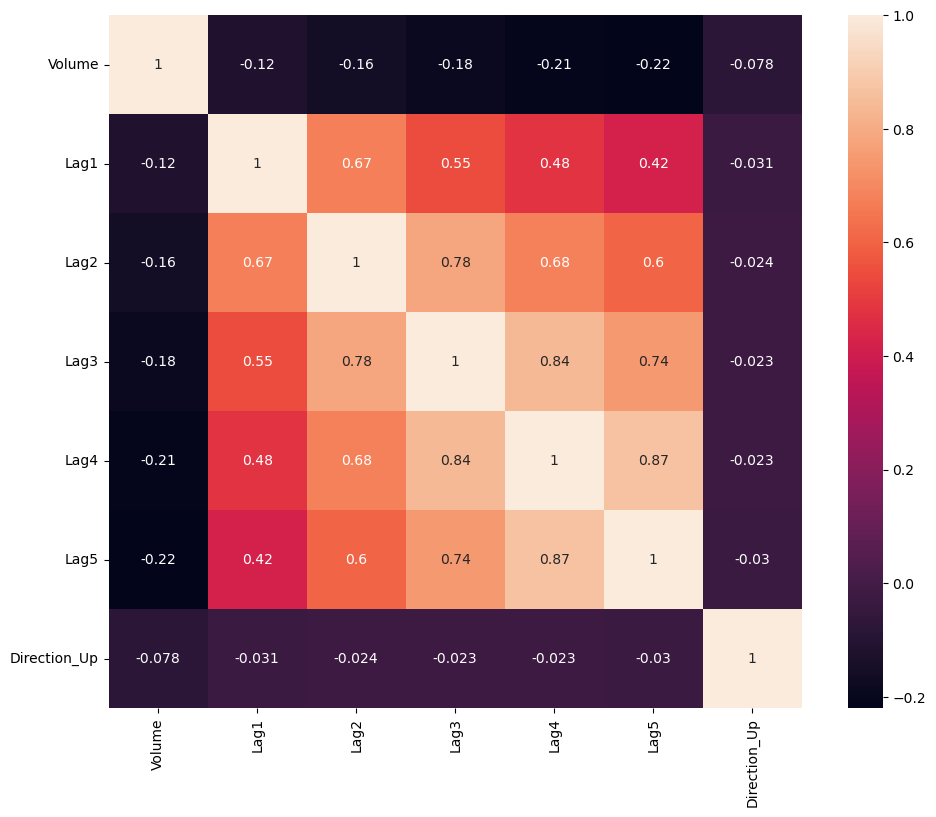

In [69]:
# Correlation matrix
corr_matrix = df[['Volume','Lag1','Lag2','Lag3','Lag4','Lag5','Direction_Up']].corr()
fig, ax     = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

### Define Accuracy/Error Metrics

In [70]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def classifier_stats(confusion_mtx):
    return pd.Series({
        'total_accuracy': 1-total_error_rate(confusion_mtx),
        'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
        'true_negative_rate (specificity)': true_negative_rate(confusion_mtx)
    })

### Run KNNs

In [71]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, HTML

df_train = df.loc[:'2015-01-01']
df_test = df.loc['2015-01-01':]

predictors  = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X_train = np.array(df_train[predictors])
y_train = np.array(df_train['Direction_Up'])
X_test  = np.array(df_test[predictors])
y_test  = np.array(df_test['Direction_Up'])

# MODELS

# KNN_1
K = 1
model_knn_1 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# KNN_3
K = 3
model_knn_3 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
# KNN_10
K = 40
model_knn_40 = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)


models = {'knn_1': model_knn_1,
          'knn_3': model_knn_3,
          'knn_40': model_knn_40
         }
scaled = ['knn_1', 'knn_3', 'knn_40']


# PREDICT
for k in models:
    # Predict
    if k in scaled:
        y_pred = models[k].predict(preprocessing.scale(X_test))
    else:
        y_pred = models[k].predict(X_test)
    # Confusion table
    display(HTML('<h3>{}</h3>'.format(k)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    # Classifier stats
    display(classifier_stats(confusion_mtx))

,y_pred=0,y_pred=1,Total
,,,
y=0,451,527,978
y=1,483,656,1139
Total,934,1183,


total_accuracy                      0.522910
true_positive_rate (sensitivity)    0.575944
true_negative_rate (specificity)    0.461145
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,410,568,978
y=1,430,709,1139
Total,840,1277,


total_accuracy                      0.528578
true_positive_rate (sensitivity)    0.622476
true_negative_rate (specificity)    0.419223
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,371,607,978
y=1,275,864,1139
Total,646,1471,


total_accuracy                      0.583373
true_positive_rate (sensitivity)    0.758560
true_negative_rate (specificity)    0.379346
dtype: float64